In [2]:
!pip install clearml

     |████████████████████████████████| 1.0 MB 8.1 MB/s 
     |████████████████████████████████| 86 kB 7.9 MB/s 


In [3]:
%%bash

export api=`cat <<EOF
api {
    # Stef Telford's workspace
    web_server: https://app.community.clear.ml
    api_server: https://api.community.clear.ml
    files_server: https://files.community.clear.ml
    credentials {
        "access_key" = "GH8VFHZGORLYRGFGFJLT"
        "secret_key" = "SUxV89MD3xdVQ2Xb0zSzyhvXoeUCVO33K5AVScWt195Pz4zOTX"
    }
}
EOF
`
echo "$api" > /root/clearml.conf

In [4]:
from clearml import Task
task = Task.init(project_name="Dogs and Cats Classification", task_name = "RestNet-50")

ClearML Task: created new task id=0bfa817645ea4880a25c4a9d3d269ec2
2021-08-18 02:37:41,401 - clearml.Task - INFO - No repository found, storing script code instead
ClearML results page: https://app.community.clear.ml/projects/71c0bd86191b40588d19d434d48969c3/experiments/0bfa817645ea4880a25c4a9d3d269ec2/output/log


In [5]:
from google.colab import drive
drive.mount('/content/gdirve')

Drive already mounted at /content/gdirve; to attempt to forcibly remount, call drive.mount("/content/gdirve", force_remount=True).


# **Import Libraries**

In [6]:
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [51]:
IMAGE_WITH = 224
IMAGE_HEIGHT = 224
CHANNELS = 3


In [23]:
train_path = '/content/gdirve/MyDrive/DogandCatClassification/training_set/training_set'
test_path = '/content/gdirve/MyDrive/DogandCatClassification/test_set/test_set'

73 65


# **Tăng cường dữ liệu**

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )

In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [39]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (IMAGE_WITH, IMAGE_HEIGHT),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 )


Found 8013 images belonging to 2 classes.


In [40]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (IMAGE_WITH, IMAGE_HEIGHT),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            )

Found 2023 images belonging to 2 classes.


# **Plot Image**

In [41]:
def plotIMG(img):
  fig, axes = plt.subplots(1, 10, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(img, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [42]:
imgs, labels = next(training_set)

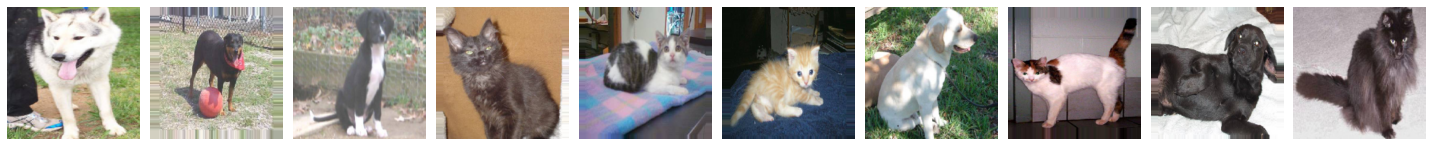

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [43]:
plotIMG(imgs)
print(labels)

In [44]:
training_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [55]:
vgg = VGG16(input_shape= (IMAGE_WITH, IMAGE_HEIGHT, CHANNELS), weights='imagenet', include_top=False)

In [56]:
for layer in vgg.layers: 
  layer.trainable = False

In [59]:
folders = glob('/content/gdirve/MyDrive/DogandCatClassification/training_set/training_set/*')

In [60]:
x = Flatten()(vgg.output)
predictions = Dense(len(folders), activation='softmax')(x)

In [62]:
model = Model(inputs = vgg.input, outputs = predictions)

In [66]:
 model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
history = model.fit(training_set,
                    validation_data = test_set,
                    epochs = 5,
                    steps_per_epoch = len(training_set),
                    validation_steps = len(test_set))

Epoch 1/5
251/251 [==============================] - 2954s 12s/step - loss: 0.3019 - accuracy: 0.8687 - val_loss: 0.2031 - val_accuracy: 0.9214
Epoch 2/5
251/251 [==============================] - 118s 470ms/step - loss: 0.2144 - accuracy: 0.9130 - val_loss: 0.2128 - val_accuracy: 0.9214
Epoch 3/5
251/251 [==============================] - 118s 468ms/step - loss: 0.1906 - accuracy: 0.9214 - val_loss: 0.2605 - val_accuracy: 0.9036
Epoch 4/5
251/251 [==============================] - 117s 465ms/step - loss: 0.1662 - accuracy: 0.9329 - val_loss: 0.2032 - val_accuracy: 0.9273
Epoch 5/5
251/251 [==============================] - 117s 464ms/step - loss: 0.1596 - accuracy: 0.9388 - val_loss: 0.2829 - val_accuracy: 0.9031


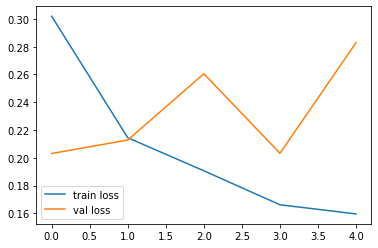

In [72]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()


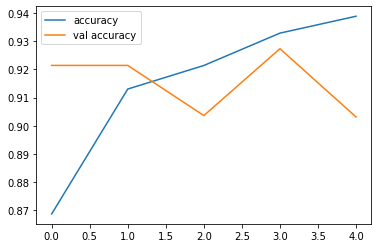

In [74]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

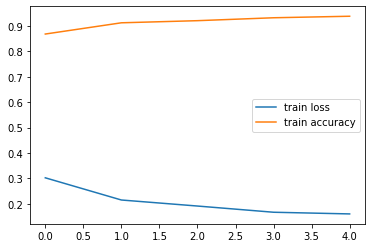

In [75]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.legend()
plt.show()

In [76]:
model.save('dog_cat.hdf5')

[[1. 0.]]
cat


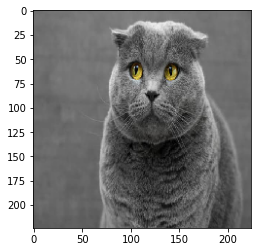

In [126]:
from tensorflow.keras.models import load_model
test_cat = image.load_img('/content/gdirve/MyDrive/DogandCatClassification/cat1.jpg', target_size=IMAGE_SIZE)
plt.imshow(test_cat)
test_cat = image.img_to_array(test_cat)
test_cat = np.expand_dims(test_cat, axis = 0)
model = load_model('/content/gdirve/MyDrive/DogandCatClassification/dog_cat.hdf5')
result_cat = model.predict(test_cat)
print(result_cat)
if round(result_cat[0][0]) == 1:
    prediction = 'cat'
else: 
    prediction = 'dog'
print(prediction)

[[1. 0.]]
cat


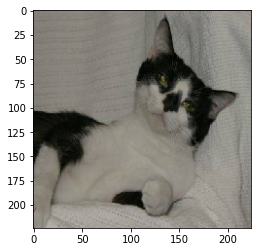

In [120]:

import random
cat_paths = '/content/gdirve/MyDrive/DogandCatClassification/test_set/test_set/cats'
test_cat_path = os.listdir(cat_paths)
idx_cat = random.randint(0, len(test_cat_path))
def load_image(path):
    img = image.load_img(path, target_size = IMAGE_SIZE)
    return img
test_cat = load_image(os.path.join(cat_paths, test_cat_path[idx_cat]))
plt.imshow(test_cat)
test_cat = image.img_to_array(test_cat)
test_cat = np.expand_dims(test_cat, axis = 0)
model = load_model('/content/gdirve/MyDrive/DogandCatClassification/dog_cat.hdf5')
result_cat = model.predict(test_cat)
print(result_cat)
if round(result_cat[0][0]) == 1:
    prediction = 'cat'
else: 
    prediction = 'dog'
print(prediction)


[[0. 1.]]
dog


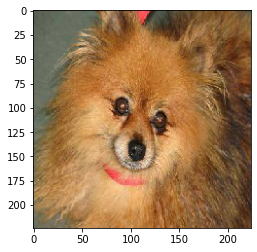

In [123]:
import random
dog_paths = '/content/gdirve/MyDrive/DogandCatClassification/test_set/test_set/dogs'
test_dog_path = os.listdir(dog_paths)
idx_dog = random.randint(0, len(test_dog_path))
def load_image(path):
  img = image.load_img(path, target_size = IMAGE_SIZE)
  return img
testdog = load_image(os.path.join(dog_paths, test_dog_path[idx_dog]))
plt.imshow(testdog)
testdog = image.img_to_array(testdog)
testdog = np.expand_dims(testdog, axis=0)
model = load_model('/content/gdirve/MyDrive/DogandCatClassification/dog_cat.hdf5')
result_dog = model.predict(testdog)
print(result_dog)
if round(result_dog[0][0])==1:
  prediction = 'cat'
else:
  prediction = 'dog'
print(prediction)